In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/dataset/winequality-white.csv"
df = pd.read_csv(file_path, sep=';')

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 문자형 컬럼 확인
cat_cols = df.select_dtypes(include=["object"]).columns
print("문자형 컬럼:", cat_cols.tolist())

# LabelEncoder로 문자형 컬럼 인코딩
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 결과 확인
print(df.head())

문자형 컬럼: []
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
X = df.drop(columns=['quality'])
y = df['quality']

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4) 훈련/테스트 분할 (80/20, 재현성 고정)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

logl = LogisticRegression()
logl.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# 데이터 전처리
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [24]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test_knn)
rf_pred = rf.predict(X_test)
logl_pred = logl.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
logl_accuracy = accuracy_score(y_test, logl_pred)

print("Logistic Regression Accuracy:", logl_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.45918367346938777
Decision Tree Accuracy: 0.5989795918367347
K-Nearest Neighbors Accuracy: 0.5428571428571428
Random Forest Accuracy: 0.7


In [29]:
decisions = logl.decision_function(X_test)

In [30]:
decisions

array([[-1.5850489 , -1.83030383,  1.59190802, ...,  1.93920069,
         0.3350658 , -3.31701251],
       [-2.37596843, -0.70007793,  0.85605953, ...,  2.47623695,
         0.22014303, -3.25125446],
       [-2.47354402, -0.3178196 ,  1.56229062, ...,  1.89145957,
        -0.04980253, -3.24477313],
       ...,
       [-2.65264921, -0.36720948,  2.41746983, ...,  1.59761762,
         0.02868104, -3.92224445],
       [-3.50166716,  1.00376719,  3.16168908, ...,  1.19220655,
        -0.34291737, -4.32456098],
       [-2.997937  ,  0.93753749,  2.47884745, ...,  1.31859001,
        -0.1430975 , -4.10700044]])

In [28]:
print(logl.classes_)

[3 4 5 6 7 8 9]


In [27]:
print(logl.coef_, logl.intercept_)

[[-3.84966891e-02 -9.38401177e-04 -2.09879236e-03 -2.93714066e-02
  -1.27143860e-04  5.86240204e-02 -2.00054234e-02 -8.77109522e-03
  -2.84826722e-02 -4.76839450e-03 -1.06761713e-01]
 [ 3.54207481e-02  1.78077077e-02 -3.09116820e-03 -5.67106417e-02
   9.27129608e-04 -6.95865055e-02  2.46778176e-02 -1.79541876e-03
  -7.81494628e-03 -3.65783340e-03 -1.14342477e-01]
 [ 2.94039059e-01  4.17578641e-02  8.05516120e-03  2.85203614e-02
   6.32220687e-03 -2.30423238e-02  1.77934167e-02  3.76481367e-02
   9.37226538e-02 -1.99148618e-03 -2.04539501e-01]
 [ 6.72961888e-03 -4.12013465e-02  1.05669076e-02  4.78152628e-02
   5.52558184e-04 -6.99172205e-03  7.12973622e-03  7.85546233e-03
   2.63809299e-02  7.90252958e-03  1.40175934e-01]
 [-1.75828310e-01 -1.49315633e-02 -9.10317090e-03  2.39444707e-02
  -5.84672570e-03 -4.87947837e-04 -4.94300404e-04 -1.91495072e-02
  -3.95060723e-02  8.08355786e-03  2.73506931e-01]
 [-1.05396910e-01 -1.82193273e-03 -3.86045464e-03 -3.22763651e-03
  -1.61065276e-03  

In [31]:
from scipy.special import expit
print(expit(decisions))

[[0.17008162 0.13820208 0.83088438 ... 0.8742643  0.58299145 0.03499215]
 [0.08502368 0.33179495 0.70183672 ... 0.92245906 0.55481456 0.03728184]
 [0.07773378 0.42120722 0.8266818  ... 0.86892186 0.48755194 0.03751516]
 ...
 [0.06582591 0.40921548 0.9181498  ... 0.83168515 0.50716977 0.01941231]
 [0.02926483 0.73179861 0.95936684 ... 0.76713547 0.41510099 0.01306637]
 [0.04751916 0.71860197 0.92264558 ... 0.78894703 0.46428655 0.01619061]]


------------------------- 딥러닝 시작 -------------------------

In [ ]:
X = df.drop(columns=['quality'])
y = df['quality']

from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 데이터 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y)
X = X
# values 없어야 됨, attribute가 없다고 뜸
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4076 - loss: 1.5534 - val_accuracy: 0.5306 - val_loss: 1.1697
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5101 - loss: 1.1702 - val_accuracy: 0.5510 - val_loss: 1.0935
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5606 - loss: 1.1034 - val_accuracy: 0.5421 - val_loss: 1.0726
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5405 - loss: 1.0793 - val_accuracy: 0.5408 - val_loss: 1.0654
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5309 - loss: 1.0812 - val_accuracy: 0.5548 - val_loss: 1.0372
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5493 - loss: 1.0524 - val_accuracy: 0.5446 - val_loss: 1.0359
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5478 - loss: 1.0595 - val_accuracy: 0.5548 - val_loss: 1.0363
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5584 - loss: 1.0337 - val_accuracy: 0.

In [ ]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


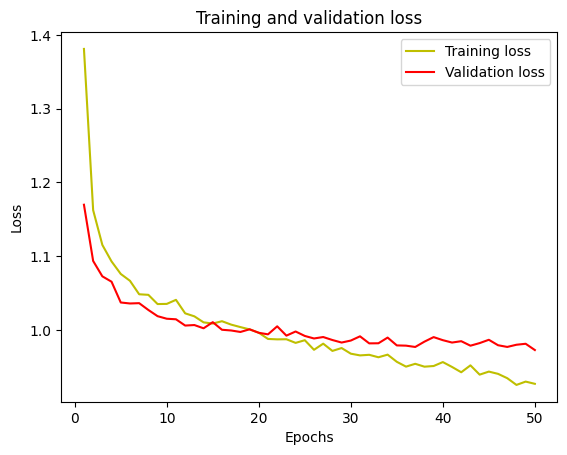

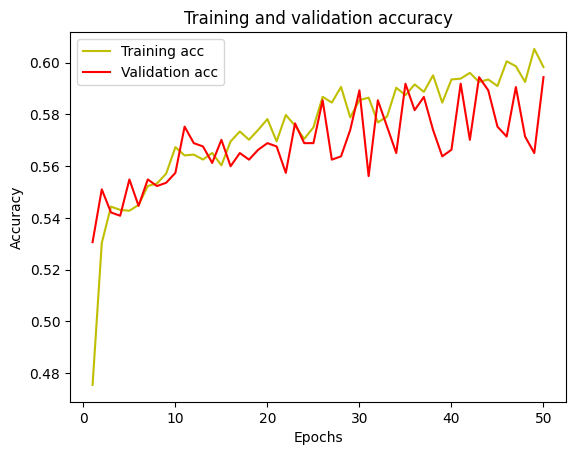

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.70      0.14      0.23        51
           2       0.60      0.54      0.57       295
           3       0.53      0.75      0.62       409
           4       0.58      0.40      0.47       183
           5       0.00      0.00      0.00        33

    accuracy                           0.56       980
   macro avg       0.49      0.32      0.35       980
weighted avg       0.55      0.56      0.53       980

[[  1   0   5   3   0   0]
 [  0   7  32  11   1   0]
 [  1   2 159 130   3   0]
 [  0   1  64 307  37   0]
 [  0   0   4 106  73   0]
 [  0   0   0  21  12   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


------------------------여기까지가 딥러닝 시작-----------------------------